# <center><font color=navy>Data Science for Quantitative Finance</font></center>
## <center><font color=navy>Stylized Facts of Asset Returns</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

---

- The goal of investing is, of course, to make a profit. The revenue from investing, or the loss in the case of a negative revenue, depends upon both the change in **prices** and the **amounts** of the assets being held. 

- Returns measure this, because returns on an asset, e.g., a stock, a crypto, a bond, a portfolio of stocks and bonds, are changes in price expressed as a fraction of the initial price.

>Here are some articles that survey stylized facts of asset return (daily & univariate). Parts of these will be discussed in class.

>- [Cont, Rama (2001) "Empirical properties of asset returns: stylized facts and statistical issues," Qunatitative Finance, 1, 223-236.](http://rama.cont.perso.math.cnrs.fr/pdf/empirical.pdf)
>- [Rydberg, T. (2005) "Realistic Statistical Modeling of Financial Data," Technical Report, Nuffield College, Oxford, UK.](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.217.2270&rep=rep1&type=pdf)

**A stylized fact is a term used in economics to refer to empirical findings that are so consistent (for example, across a wide range of instruments, markets and time periods) that they are accepted as truth.**

---


## Stylized facts for daily asset returns: Taxonomy



For daily data we observe the following stylized facts:

* Andreou, Pittis and Spanos (2001)
    - distribution
    - dependence
    - heterogeneity
    
* Challet, Marsili and Zhang (2001)
    - volatility and volume clustering
    - return and volume histograms
    
* Cont (2001)
    
    - absence of autocorrelations
    
    -heavy tails
    
    -gain/loss asymmetry
    
    -aggregational Gaussianity
    
    -intermittency
    
    -volatility clustering
    
    -conditional heavy tails
    
    -slow decay of autocorrelation in absolute returns
    
    -leverage effect
    
    -volume/volatility correlation
    
    -asymmetry in time scales

* Johnson, Jefferies and Hui (2003)
    - fat-tailed PDF of price-changes, with non-trivial scaling properties
    - slow decay of the autocorrelation of absolute value of price-changes
    - volatility clustering
    - fast decay of the autocorrelation of price-changes
    
* Taylor (2005)

    - the distribution of returns is not normal
    - there is almost no correlation between returns for different days
    - the correlations between the magnitudes of returns on nearby days are positive and statistically significant
    
* Zivot (2016)

    - Prices appear to be random walk non-stationary and returns appear to be mostly covariance stationary. There is evidence that return volatility changes over time.
    - Returns are not normally distributed. Empirical distributions have much fatter tails than the normal distribution (excess kurtosis).
    - Assets that have high average returns tend to have high standard deviations (volatilities) and vice-versa. This is the no free lunch principle.
    - Returns on individual assets (stocks) have higher standard deviations than returns on diversified portfolios of assets (stocks).
    - Returns are approximately uncorrelated over time. That is, there is little evidence of linear time dependence in asset returns. 
    - Returns are not independent over time. Absolute and squared returns are positively auto correlated and the correlation dies out very slowly. Volatility appears to be auto correlated and, hence, predictable.
    
> A good model is one that can explain many stylized facts of the data. A bad model does not capture important stylized facts.

#### Arithmetic Returns

Let $P_t$ be the price of an asset at time $t$. Assuming no dividends, the net return over the holding period from time $t − 1$ to time $t$ is

$$ R_t = \frac{P_t}{P_{t−1}} − 1 = \frac{P_t − P_{t−1}}{P_{t−1}}$$


The numerator $P_t − P_{t−1}$ is the revenue or profit during the holding period, with a negative profit meaning a loss. The denominator, $P_{t−1}$, was the initial investment at the start of the holding period. Therefore, the net return can be viewed as the relative revenue or profit rate.

The revenue from holding an asset is

<center>revenue = initial investment × net return</center>

- Returns are scale-free, meaning that they do not depend on units (dollars,cents, etc.).
- Returns are not unitless. Their unit is time; they depend on the units of t (hour, day, etc.).

 #### Log Returns
 
 Log returns, also called continuously compounded returns, are denoted by $r_t$ and defined as
 
 $$ r_t = log(1 + R_t) = log \frac {P_t}{P_{t−1}} = log(p_t) − log(p_{t−1})  $$
 
 
>Example: Assume $P_{t=0} = 10, P_{t=1} = 20, P_{t=2} = 10$, what's the total return at time 2? 


For details see: [Calculating and Comparing Security Returns is Harder than you Think: A Comparison between Logarithmic and Simple Returns](https://deliverypdf.ssrn.com/delivery.php?ID=333026086024085029028095028066116093053092066027063087014082077064068072100107102006097025058123057012116084116122094095071065122015029086009006093004011117080075041078056081103015101092127119122003024068107123065107086107014007016124097027122016016&EXT=pdf&INDEX=TRUE)

#### Adjustment for Dividends

Many stocks, especially those of mature companies, pay dividends that must be accounted for when computing returns. Similarly, bonds pay interest. If a dividend (or interest) Dt is paid prior to time $t$, then the gross return at time $t$ is defined as

$$ R_t = \frac{P_t+D_t}{P_{t−1}} − 1 $$

and the log return is 

 $$ r_t = log(1 + R_t) = log (P_t + D_t) - log (P_{t−1})  $$


### Fact 1: Distribution of returns (is not normal)

In this notebook, we discuss three probability distributions commonly used in investment management: the normal distribution, the Student’s t-distribution, and the family of stable distributions (i.e. the inverse gamma distribution). It should be emphasized that although the normal distribution enjoys widespread attention in finance due to its well-known characteristics and mathematical simplicity, its use might be ill-suited to replicate the real-world behavior of financial returns. Although a distribution may have appeal because of its mathematical simplicity, the observed behavior of many quantities in indicates a need for more flexible distributions compared to keeping models mathematically simple. For example, although the Student’s t-distribution is able to mimic some behavior inherent in financial data such as so-called fat tails or heavy tails (which means that a lot of the probability mass is attributed to extreme values), it fails to capture other observed behavior such as skewness. For this reason, there has been increased interest in non-normal stable probability distributions known as the Paretian stable distributions.

Let's first download the stock price dataset from yahoo finance. Then We will convert prices to log returns.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf
import statsmodels.stats as stats
import statsmodels.api as sm
from statsmodels.stats import stattools
from scipy import stats
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Preparation

### Load and Explore Time Series Data

In [17]:
# load dataset
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2022,1,25)
df = yf.download("GOOG", start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [18]:
# display first few lines of a time series
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563
2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582


In [19]:
# Remove days (rows) with missing values
df.dropna(axis='index', how='all', inplace=True)

In [20]:
df = df['Adj Close']

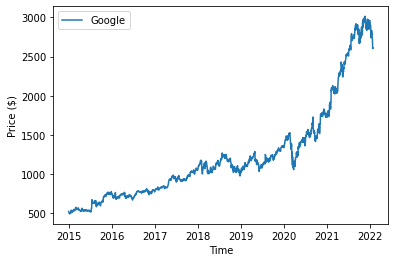

In [21]:
# Line Plot
plt.plot(df,label="Google")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [22]:
Re = np.log(df).diff()
Re.head()

Date
2015-01-02         NaN
2015-01-05   -0.021066
2015-01-06   -0.023450
2015-01-07   -0.001715
2015-01-08    0.003148
Name: Adj Close, dtype: float64

In [23]:
Re = Re[1:]
Re.head()

Date
2015-01-05   -0.021066
2015-01-06   -0.023450
2015-01-07   -0.001715
2015-01-08    0.003148
2015-01-09   -0.013035
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

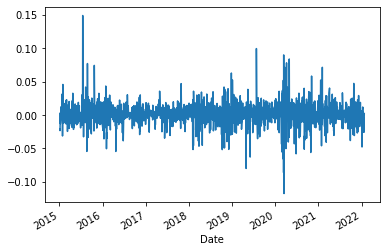

In [24]:
# Line Plot
Re.plot()

It’s clear that there are time periods with high volatility and other periods with low volatility. This phenomenon is called volatility clustering and it’s very common in the stock market. Practically speaking, the standard deviation changes during time, making the time series non-stationary.

## Parameters of a distribution
### Measures of Center
Centrality measures give you a sense of a typical value you'd expect to see. Common measures of center include the mean, median and mode.

In [34]:
Re.mean()                 # Get the mean of each column

0.0009036744763250542

The median of a distribution is the value where 50% of the data lies below it and 50% lies above it. In essence, the median splits the data in half. The median is also known as the 50% percentile since 50% of the observations are found below it. 

In [35]:
Re.median()                 # Get the median of each column

0.0010670449099077217

Although the mean and median both give us some sense of the center of a distribution, they aren't always the same. The median always gives us a value that splits the data into two halves while the mean is a numeric average so extreme values can have a significant impact on the mean. In a symmetric distribution, the mean and median will be the same. Let's investigate with a density plot:

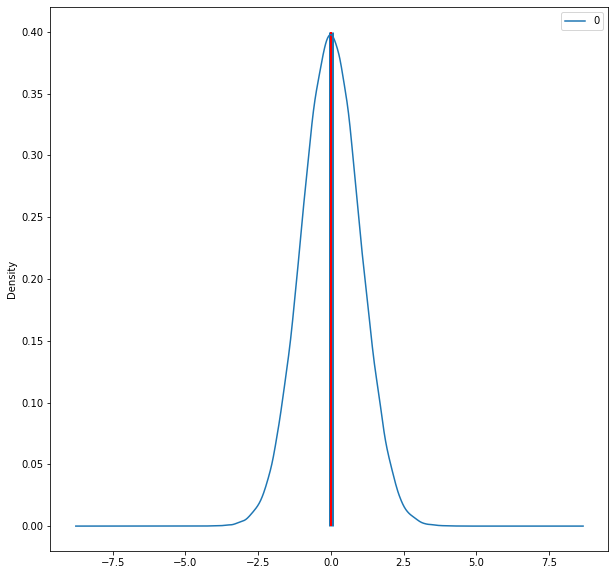

In [36]:
norm_data = pd.DataFrame(np.random.normal(size=100000))

norm_data.plot(kind="density",
              figsize=(10,10));


plt.vlines(norm_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0);

plt.vlines(norm_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red");

In the plot above the mean and median are both so close to zero that the red median line lies on top of the thicker black line drawn at the mean.

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew:

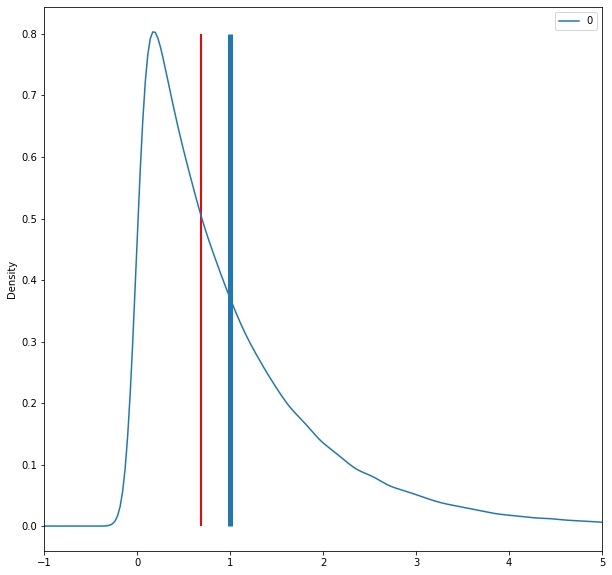

In [37]:
skewed_data = pd.DataFrame(np.random.exponential(size=100000))

skewed_data.plot(kind="density",
              figsize=(10,10),
              xlim=(-1,5));


plt.vlines(skewed_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.8,
           linewidth=5.0);

plt.vlines(skewed_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.8, 
           linewidth=2.0,
           color="red");

The mean is also influenced heavily by outliers, while the median resists the influence of outliers:

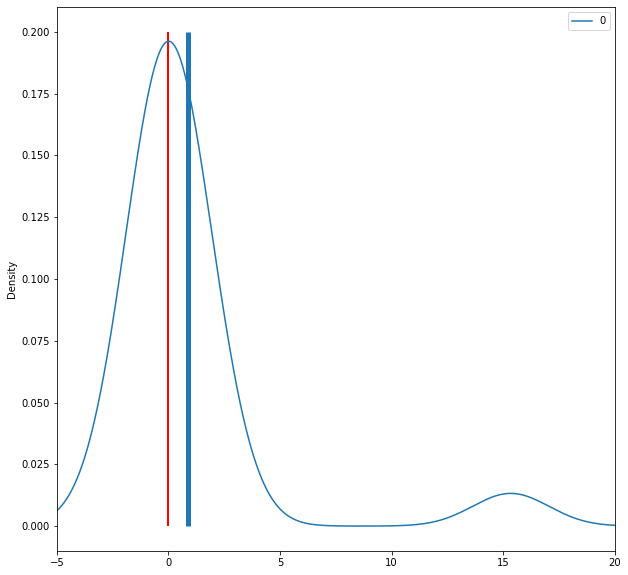

In [38]:
norm_data = np.random.normal(size=50)
outliers = np.random.normal(15, size=3)
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis=0))

combined_data.plot(kind="density",
              figsize=(10,10),
              xlim=(-5,20));


plt.vlines(combined_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=5.0);

plt.vlines(combined_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="red");

Since the median tends to resist the effects of skewness and outliers, it is known a "robust" statistic. The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.

The mode of a variable is simply the value that appears most frequently. Unlike mean and median, you can take the mode of a categorical variable and it is possible to have multiple modes. 

In [39]:
Re.mode()

0      -0.117667
1      -0.086308
2      -0.080089
3      -0.065936
4      -0.063016
          ...   
1772    0.077981
1773    0.083780
1774    0.089856
1775    0.099380
1776    0.148872
Length: 1777, dtype: float64

### Measures of Spread

Measures of spread (dispersion) are statistics that describe how data varies. While measures of center give us an idea of the typical value, measures of spread give us a sense of how much the data tends to diverge from the typical value.

One of the simplest measures of spread is the range. Range is the distance between the maximum and minimum observations:

In [40]:
max(Re) - min(Re)

0.2665391567240514

As noted earlier, the median represents the 50th percentile of a data set. A summary of several percentiles can be used to describe a variable's spread. We can extract the minimum value (0th percentile), first quartile (25th percentile), median, third quartile(75th percentile) and maximum value (100th percentile) using the quantile() function:

In [41]:
five_num = [Re.quantile(0),   
            Re.quantile(0.25),
            Re.quantile(0.50),
            Re.quantile(0.75),
            Re.quantile(1)]

five_num

[-0.1176672625586912,
 -0.006111239627418108,
 0.0010670449099077217,
 0.008819317916933578,
 0.14887189416536017]

Since these values are so commonly used to describe data, they are known as the "five number summary". They are the same percentile values returned by df.describe():

In [42]:
Re.describe()

count    1777.000000
mean        0.000904
std         0.016636
min        -0.117667
25%        -0.006111
50%         0.001067
75%         0.008819
max         0.148872
Name: Adj Close, dtype: float64

Interquartile (IQR) range is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile:

In [43]:
Re.quantile(0.75) - Re.quantile(0.25)

0.014930557544351686

The boxplots we learned to create in the lesson on plotting are just visual representations of the five number summary and IQR:

In [44]:
Re.var()

0.0002767656655306628


The standard deviation is the square root of the variance. Standard deviation can be more interpretable than variance, since the standard deviation is expressed in terms of the same units as the variable in question while variance is expressed in terms of units squared. Use df.std() to check the standard deviation:

In [45]:
Re.std()

0.016636275590728316

Since variance and standard deviation are both derived from the mean, they are susceptible to the influence of data skew and outliers. Median absolute deviation is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median:

In [46]:
abs_median_devs = abs(Re - Re.median())

abs_median_devs.median() * 1.4826

0.011070178485535296

*Note: The MAD is often multiplied by a scaling factor of 1.4826.*

### Skewness and Kurtosis

Beyond measures of center and spread, descriptive statistics include measures that give you a sense of the shape of a distribution. Skewness measures the skew or asymmetry of a distribution while kurtosis measures how much data is in the tails of a distribution v.s. the center. We won't go into the exact calculations behind skewness and kurtosis, but they are essentially just statistics that take the idea of variance a step further: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:

In [47]:
Re.skew()  # Check skewness

0.2202751277584747

In [48]:
Re.kurt()  # Check kurtosis

8.690537887078811

To explore these two measures further, let's create some dummy data and inspect it:

In [49]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

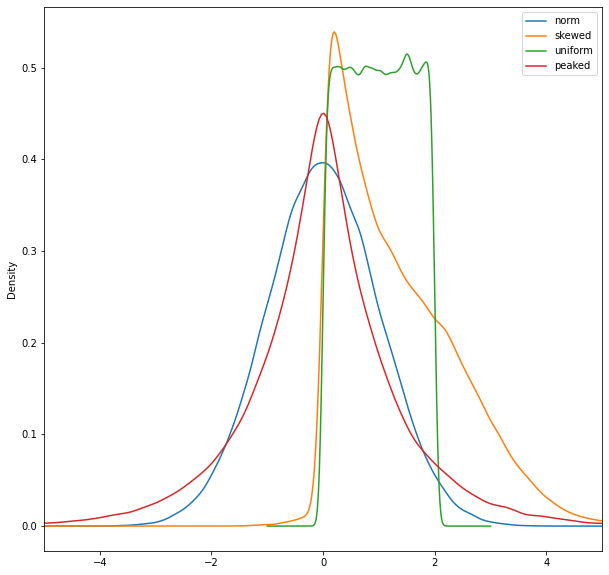

In [50]:
data_df.plot(kind="density",
            figsize=(10,10),
            xlim=(-5,5));

Now let's check the skewness of each of the distributions. Since skewness measures asymmetry, we'd expect to see low skewness for all of the distributions except the skewed one, because all the others are roughly symmetric:

In [51]:
data_df.skew()

norm       0.009458
skewed     0.992011
uniform   -0.004211
peaked    -0.016436
dtype: float64

Now let's check kurtosis.

In [52]:
data_df.kurt()

# Kurtosis obtained using Fisher’s definition of kurtosis (kurtosis of normal == 0.0). Normalized by N-1.

norm      -0.026615
skewed     1.181495
uniform   -1.204844
peaked     2.995998
dtype: float64

As we can see from the output, the normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis and the two distributions with more data in the tails vs the center have higher kurtosis.

# Probability Distributions

Many statistical tools and techniques used in data analysis are based on probability. Probability measures how likely it is for an event to occur on a scale from 0 (the event never occurs) to 1 (the event always occurs). When working with data, variables in the columns of the data set can be thought of as random variables: variables that vary due to chance. A probability distribution describes how a random variable is distributed; it tells us which values a random variable is most likely to take on and which values are less likely.

In statistics, there are a range of precisely defined probability distributions that have different shapes and can be used to model different types of random events.

## The Normal Distribution

The normal distribution is the distribution most commonly used in finance despite its many limitations. This familiar bell-shaped curve distribution, also referred to as the Gaussian distribution, is characterized by the two parameters: mean and standard deviation.

The normal distribution provides one of the most important classes of probability distributions due to its frequent appearance in data, its role in the Central Limit Theorem, and two appealing properties:

- **Property 1.** The distribution is a location-scale invariant. That is, if X has a normal distribution, then for every constant a and b, aX + b is again a normal random variable.

- **Property 2.** The distribution is stable under summation. That is, if X has a normal distribution F, and X1, ..., Xn are n independent random variables with distribution F, then X1 + ... + Xn is again a normal distrib- uted random variable.

As noted above, the normal distribution is often mentioned in the context of the Central Limit Theorem. It states that a sum of n independent random variables with finite variance and identical distributions converges in distribution to a normal random variable as n increases.


The normal or Gaussian distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.


### Are returns normally distributed?

Although the statistically significant high values of kurtosis and skewness already tell us that the returns aren’t normally distributed, a Q-Q plot will give us graphically clear information.

<AxesSubplot:>

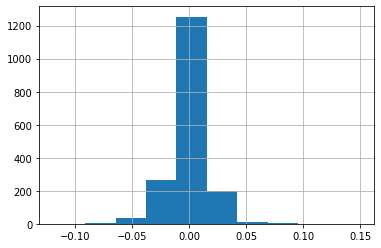

In [25]:
# Histogram and Density Plots
Re.hist()

This means a plot of the values without the temporal ordering. Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.



<AxesSubplot:ylabel='Density'>

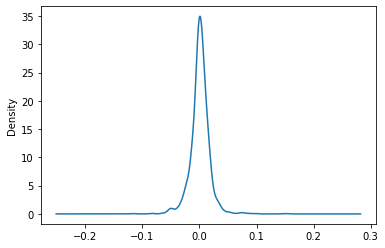

In [26]:
# Kernel density estimation (KDE)
Re.plot(kind='kde')

Text(0.5, 1.0, 'Distribution of Google returns')

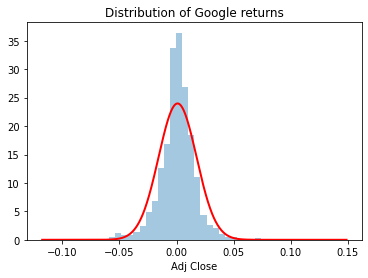

In [29]:
# Plotting the distribution of the returns ----
ax = sns.distplot(Re, kde = False, norm_hist=True)                                    

xx = np.linspace(min(Re), max(Re), num=1000)                                                  
yy = .norm.pdf(xx, loc=Re.mean(), scale=Re.std())                                                         
ax.plot(xx, yy, 'r', lw=2)
ax.set_title('Distribution of Google returns')

It has been observed that returns exhibit:

- negative skewness (third moment) — large negative returns occur more often than large positive ones. Visually: The left tail is longer; the mass of the distribution is concentrated on the right side of the distribution plot.
- excess kurtosis (fourth moment) — large (and small) returns occur more often than expected. Visually: fat-tailed and peaked distribution.

> red line representing the Normal probability density curve (with mean and standard deviation equal to sample means)

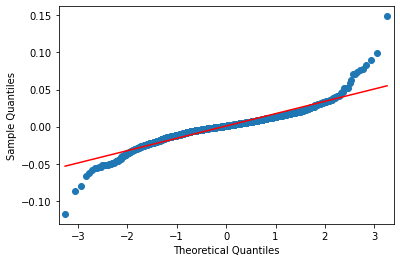

In [31]:
# QQ plot ----
qq = sm.qqplot(Re.values, line='s')
qq.show()

The straight line is what we expect for a normal distribution, while the blue line is what we get from our data. It’s clear that the quantiles of our dataset aren’t comparable with the quantiles of a normal distribution with the same mean and standard deviation.
So, returns aren’t normally distributed and this makes models like Geometric Brownian Motion (which assumes normal returns) only an approximation of the reality.

### Jarque-Bera test

To check whether the returns actually exhibit properties of a normal distribution, we will use the Jarque-Bera test, which indicates non-normality if the p-value is below a cutoff.

The JB test p-value is: 0.0
We reject the hypothesis that the data are normally distributed: True
The skewness of the returns is: 0.22008914565575097
The kurtosis of the returns is: 11.662729730276993


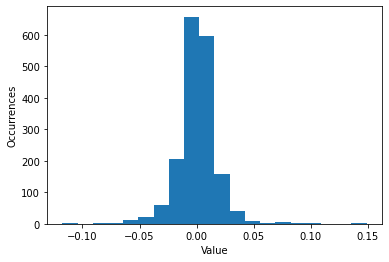

In [55]:
#Set a cutoff
cutoff = 0.01

# Get the p-value of the JB test
_, p_value, skewness, kurtosis = stattools.jarque_bera(Re)
print("The JB test p-value is:", p_value)
print("We reject the hypothesis that the data are normally distributed:", p_value < cutoff)
print("The skewness of the returns is:", skewness)
print("The kurtosis of the returns is:", kurtosis)
plt.hist(Re, bins=20)
plt.xlabel('Value')
plt.ylabel('Occurrences');

The low p-value of the JB test leads us to reject the null hypothesis that the returns are normally distributed. This is due to the high kurtosis (normal distributions have a kurtosis of  3
 ).
We will proceed from here assuming that the returns are normally distributed so that we can go through the steps of fitting a distribution. Next we calculate the sample mean and standard deviation of the series.

## Distribution Fitting with Python

You have a datastet, a repeated measurement of a variable, and you want to know which probability distribution this variable might come from. Fitting your data to the right distribution is valuable and might give you some insight about it. SciPy is a Python library with many mathematical and statistical tools ready to be used and applied to your data. 

There are different methods to estimate parameters of a distribution based on your data. Maximum Likelihood Estimation (MLE), Akaike information criterion (AIC), Maximizing Bayesian Posterior Probability, etc. SciPy performs parameter estimation using MLE.

When you fit a certain probability distribution to your data, you must then test the goodness of fit. Kolmogorov–Smirnov test is an option and the widely used one.

The Kolmogorov-Smirnov test is used to decide if a sample comes from a population with a specific distribution. The two sample Kolmogorov-Smirnov test is a nonparametric test that compares the cumulative distributions of two data sets(1,2). ... The KS test report the maximum difference between the two cumulative distributions, and calculates a P value from that and the sample sizes.


SicPy has more than 90 continuous distributions. We need to fit our data to all of these distributions and compare the results. https://docs.scipy.org/doc/scipy/reference/stats.html

In [54]:
list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']

results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(Re)
    a = stats.kstest(Re, i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

johnsonsu: statistic=0.014018205927777028, pvalue=0.8710613014182512
nct: statistic=0.016663193873044713, pvalue=0.7006635467673243
loglaplace: statistic=0.023144289775915428, pvalue=0.29253882635528716
recipinvgauss: statistic=nan, pvalue=nan
t: statistic=0.018682734262063933, pvalue=0.5580674766007061
dweibull: statistic=0.022613674772600123, pvalue=0.3187195209765594
dgamma: statistic=0.02268456378489636, pvalue=0.31513130887729957
gennorm: statistic=0.022944458431799375, pvalue=0.3022149854519006
laplace: statistic=0.02330926313398962, pvalue=0.2847173673336225
hypsecant: statistic=0.0317744529841803, pvalue=0.054117806332606766
tukeylambda: statistic=0.03913930663663656, pvalue=0.008409018028627112
fisk: statistic=0.046597519603333803, pvalue=0.0008608402364465313
logistic: statistic=0.0466000178196152, pvalue=0.0008601261779318157
genlogistic: statistic=0.046631431734382445, pvalue=0.000851194380367093
burr12: statistic=0.0472458435692944, pvalue=0.0006930224603182283
cauchy: sta

So let’s take a look at the code. the first line is defining a list that contains the names of almost all SciPy distributions. Next, we define an empty list called results. Next, there is a loop. This loop takes each distribution one by one, fits it to the data, performs K-S test on it and records the result in the results list. Next, the results are sorted based on the highest p-value (Hence the lowest statistic), and they are printed. Now, with regard to the results, it seems the best fitted distribution is johnsonsu distribution, which is of the family of heavy-tailed distributions. https://en.wikipedia.org/wiki/Johnson%27s_SU-distribution

### Fact 2: No (or almost no) significant autocorrelation in returns...

In this section, we’ll continue exploring stylized fact and will go through Stylized fact 2: Is auto-correlation absent in returns? and will see if there is decreasing auto-correlation in log returns series using Python.


> Autocorrelation measures the degree of similarity between a given time series and the lagged version of the same series over successive time intervals. It is analogous to the correlation between two time-series: the first one in its original form and one lagged by n periods. So, if you go through a data series (column) and you seem to see a pattern in that series such that by looking at that pattern, you can predict the future values based on the past values, you infer that series is having auto-correlation in it.


Example: When returns of a certain asset exhibit historically positive autocorrelation and in the past few days the price was increasing, one might reasonably expect further positive movements (of course predicting stock prices is not as simple as that).

- In case of positive auto-correlation (first-order; means that items are one value apart), if you plot time on x-axis and values of a variable on y-axis, you get an upward trend line, line moving upwards and having positive slope.

- In case of negative auto-correlation, if you plot time on x-axis and values of a variable on y-axis, you get a downward trend line, line moving downwards and having negative slope.

In [1]:
# Importing libraries
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [2]:
# Downloading MSFT data from yfinance from 1st January 2015 up to today
msft = yf.download( 'MSFT', start = '2010-01-01')
msft.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.904984,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.912712,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.765959,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.518791,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.680988,51197400


In [5]:
# Calculating log returns
msft['Log Returns'] = np.log(msft['Adj Close']/msft['Adj Close'].shift(1)) 

In [6]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume,Log Returns
Date,,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.904984,38409100,NaN
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.912712,49749600,0.000323
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.765959,58182400,-0.006156
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.518791,50559700,-0.010455
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.680988,51197400,0.006873


In [7]:
# Using back fill method to replace NaN values
msft['Log Returns'] = msft['Log Returns'].fillna(method = 'bfill')
msft.head()

,Open,High,Low,Close,Adj Close,Volume,Log Returns
Date,,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.904984,38409100,0.000323
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.912712,49749600,0.000323
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.765959,58182400,-0.006156
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.518791,50559700,-0.010455
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.680988,51197400,0.006873


#### We can find which auto-correlation exists in a series by means of a correlogram or ACF plot.

- On x-axis, we have lag which starts from 0 and shows auto-correlation of each value with itself. It, then, goes increasing from zero to the lag value you define.

- On y-axis, we have value of auto-correlation for each lag. For lag 0, the auto-correlation value will be 1. For lag 1, the auto-correlation value is actually between successive values – one value apart. For lag 2, the gap between two successive values will be 2 and so on.

- We will obtain the ACF curve of log returns series of MSFT stock data and see if it satisfies Stylized fact 2.

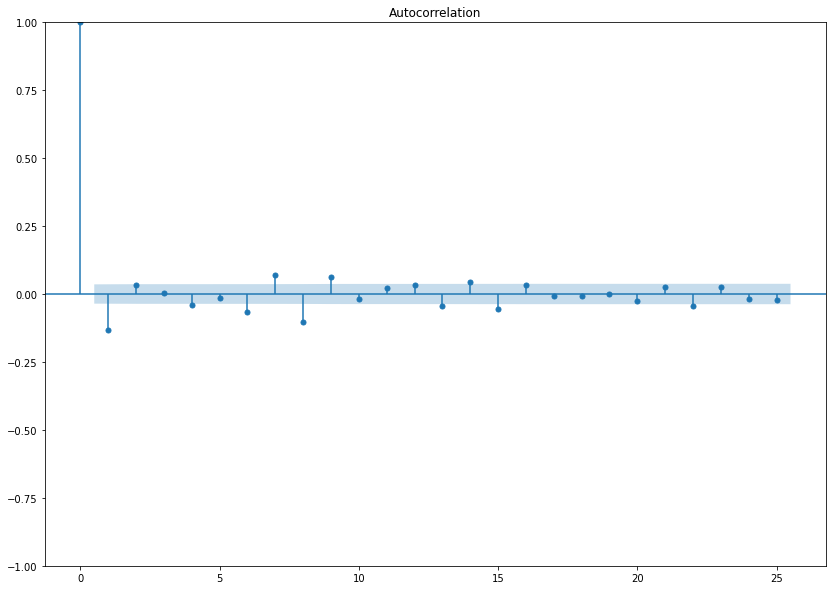

In [7]:
# Setting lags to 25, significance level to 0.05, confidence level to 0.95
fig, ax = plt.subplots(figsize=(14, 10))
acf = smt.graphics.plot_acf(msft['Log Returns'], lags=25, alpha=0.05, ax = ax)

From the above graph, we can see that few auto-correlation values corresponding to lag values 1, 4, 6, 7, 8 and 9 are lying outside the confidence interval of 0.05 (region shaded in blue). After this, the auto-correlation values go on decreasing and become smaller and smaller.

> From above, we can see that

- there is no auto-correlation in the log returns series.
- the auto-correlation values go on decreasing and become smaller and smaller.

### Small and slowly decreasing autocorrelation in squared and absolute returns

- When modeling returns, taking into account volatility can be of paramount importance in the decision making (buy/sell) process. 
- Volatility is commonly understood as the standard deviation (the squared root of variance) of the returns.
- Variance is basically the average of squared returns (the average of short-term (daily) returns in the long term is expected to be zero (EMH)).
- In case of asset returns we can observe periods of high/low volatility. That is called ‘volatility clustering’ and can be observed at the time series plot of log returns.



[Text(0.5, 1.0, 'Autocorrelation plots of absolute log returns'),
 Text(0, 0.5, 'Absolute Log Returns'),
 Text(0.5, 0, 'Lag')]

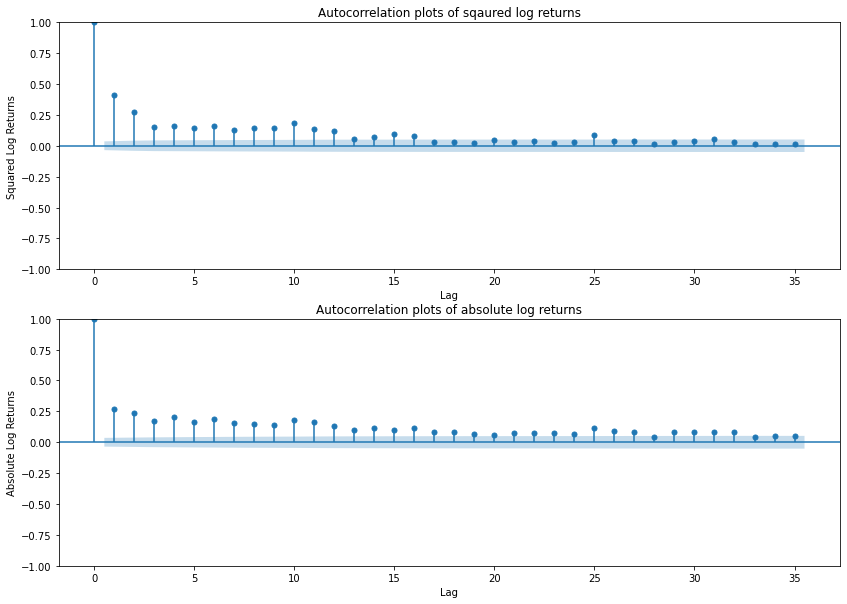

In [12]:
# Creating the acf plots for squared and absolute returns
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Using statsmodels library to obtain acf plot for squared returns
smt.graphics.plot_acf(msft['Log Returns'] ** 2, lags=35, alpha=0.05, ax = ax[0])

# Setting title, y-axis labels and x-axis labels of first subplot 
ax[0].set(title='Autocorrelation plots of sqaured log returns', ylabel='Squared Log Returns', xlabel='Lag')

# Obtaining acf plot of absolute returns using abs function of numpy library
smt.graphics.plot_acf(np.abs(msft['Log Returns']), lags=35, alpha=0.05, ax = ax[1])

# Setting title, y-axis labels and x-axis labels of second subplot 
ax[1].set(title='Autocorrelation plots of absolute log returns', ylabel='Absolute Log Returns', xlabel='Lag')

As can be seen from above,

- In the first sub-plot, the auto-correlation for lags up to 16 crosses the blue shaded area (confidence interval), after that it’s inside that area and is decreasing also.
- In the second sub-plot, the auto-correlation for lags up to 18 crosses the said area and after that lies within the area (except for lag 25 and 30.

Thus, we have established and verified stylized fact here, i.e., there is decreasing auto-correlation for squared and absolute log returns.

### Fact 3: Volatility in Returns

<AxesSubplot:title={'center':'Daily log returns of MSFT'}, xlabel='Date'>

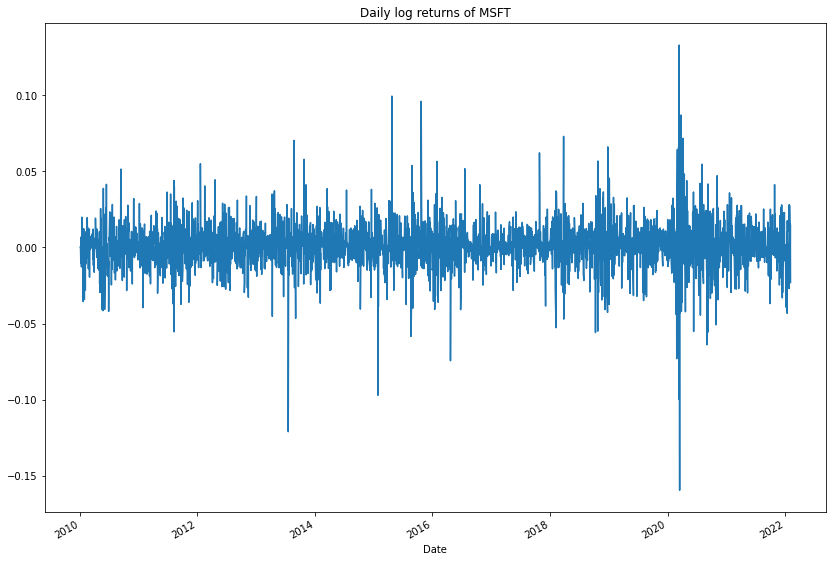

In [8]:
# Line chart of log return series
msft['Log Returns'].plot(title = 'Daily log returns of MSFT', figsize = (14,10))

we can see that volatility clusters are formed in the line chart – there are some periods having higher returns and some periods have lower returns and they alternate forming a cycle of high-low-high. Thus, volatility doesn’t remain the same always.

Once provided with this evidence, it might be useful to model our time series with algorithms which take into account that phenomenon, also known as heteroskedasticity. Those models are ARCH and GARCH, which differs from the standard Autoregressive moving average (ARMA) models since the homoskedasticity is not assumed anymore (you will learn more about ARMA models and (G)ARCH family models soon)

### Fact 4: Leverage Effect

Leverage effect refers to negative correlation between asset’s returns and the changes in its volatility. Thus, whenever we see rise in returns, there will be decreaseThe leverage effect refers to the generally negative correlation between an asset return
and its changes of volatility. A natural estimate consists in using the empirical correlation
between the daily returns and the changes of daily volatility estimated from high frequency data.

In [9]:
# Taking monthly window - average of 21 days per month is taken in the trading world, 
msft['21_day_mstd'] = msft[['Log Returns']].rolling(window=21).std()

# Taking yearly window - average of 252 days per year is taken in the trading world, 
msft['252_day_mstd'] = msft[['Log Returns']].rolling(window=252).std()

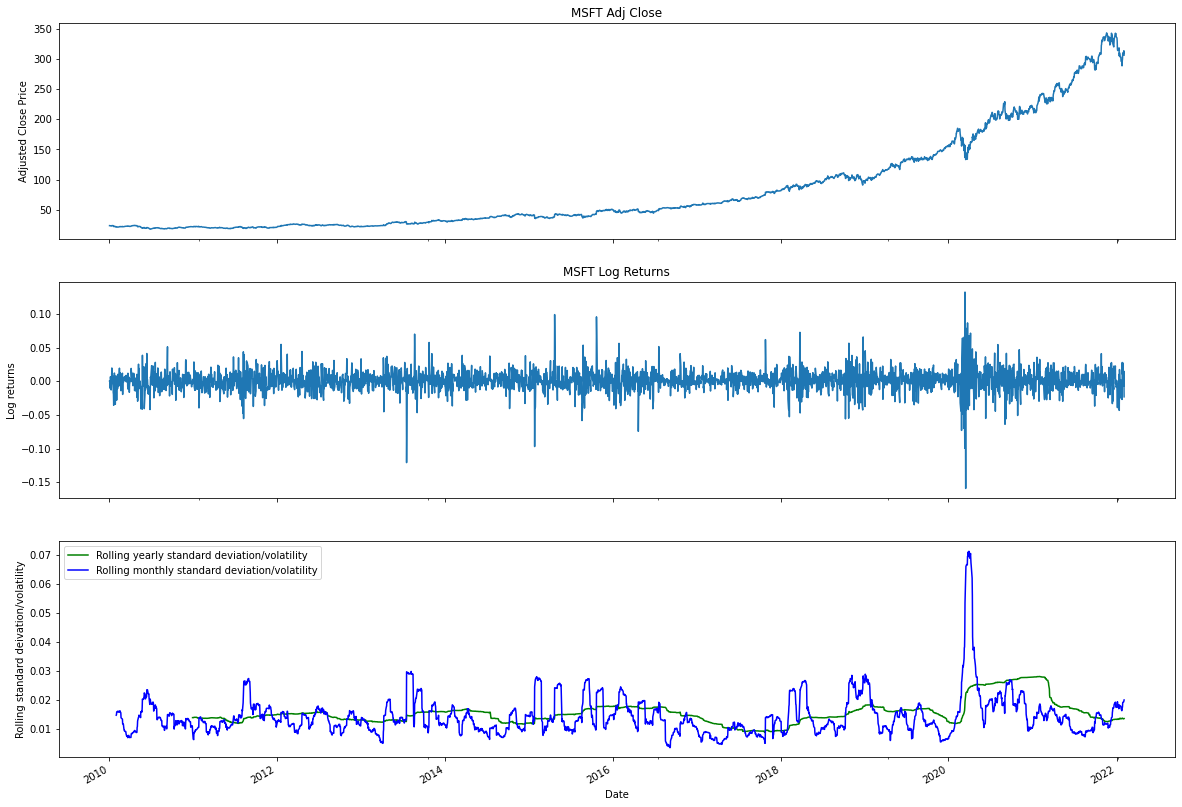

In [12]:
# Plotting MSFT Adj Close, daily log returns, 21_day_mstd and 252_day_mstd 

fig, ax = plt.subplots(3, 1, figsize=(20, 15), sharex=True) # sharex controls sharing of properties among x-axis.

# Subplot 1 - Daily Adj Close trend
msft['Adj Close'].plot(ax=ax[0])
# Setting title and ylabel
ax[0].set(title='MSFT Adj Close', ylabel='Adjusted Close Price')

# Subplot 2 - Daily log returns
msft['Log Returns'].plot(ax=ax[1])
# Setting title and ylabel
ax[1].set(title='MSFT Log Returns', ylabel='Log returns')

# Subplot 3 - 21 days and 252 days windows to calculate rolling standard deviations
msft['252_day_mstd'].plot(ax=ax[2], color='g', label='Rolling yearly standard deviation/volatility')
msft['21_day_mstd'].plot(ax=ax[2], color='b', label='Rolling monthly standard deviation/volatility')
ax[2].set(ylabel='Rolling standard deivation/volatility', xlabel='Date')
ax[2].legend()

We can see that when log returns decrease, the volatility shoots up. 